In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('D:/pandas/pivot_dataset.xlsx')
df

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,98,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44
5,2019-04-01,East,Jones,Binder,60,4.99,299.40
6,2019-04-18,Central,Andrews,Pencil,80,1.99,149.25
7,2019-05-05,Central,Jardine,Pencil,90,4.99,449.10
8,2019-05-22,West,Thompson,Pencil,32,1.99,63.68
9,2019-06-08,East,Jones,Binder,60,8.99,539.40


In [6]:
df2 = df.pivot_table(index='Item', columns='Region', values=['Total', 'Units','Unit Cost']
                    ,aggfunc=sum)
df2

Total                   Unit Cost                  Units         \
Region   Central     East     West   Central   East    West Central   East   
Item                                                                         
Binder   5762.63  2535.66  1279.36     91.93  40.95   39.98   424.0  234.0   
Desk      875.00      NaN   825.00    250.00    NaN  275.00     7.0    NaN   
Pen       539.73  1354.25   151.24     19.99  33.97    1.99    27.0  175.0   
Pen Set  2421.39  1748.48      NaN     46.42  36.97     NaN   243.0  152.0   
Pencil   1540.32   363.70   231.12     24.11   6.98    4.98   503.0  133.0   

               
Region   West  
Item           
Binder   64.0  
Desk      3.0  
Pen      76.0  
Pen Set   NaN  
Pencil   88.0

In [7]:
df2 = df.pivot_table(index='Item', columns='Region', values=['Total', 'Units']
                    ,aggfunc=sum,margins=True )
df2

Total                               Units                    
Region    Central     East     West       All Central   East   West   All
Item                                                                     
Binder    5762.63  2535.66  1279.36   9577.65   424.0  234.0   64.0   722
Desk       875.00      NaN   825.00   1700.00     7.0    NaN    3.0    10
Pen        539.73  1354.25   151.24   2045.22    27.0  175.0   76.0   278
Pen Set   2421.39  1748.48      NaN   4169.87   243.0  152.0    NaN   395
Pencil    1540.32   363.70   231.12   2135.14   503.0  133.0   88.0   724
All      11139.07  6002.09  2486.72  19627.88  1204.0  694.0  231.0  2129

In [8]:
# grouper()



In [13]:
df3 = df.pivot_table(index=pd.Grouper(freq='M', key='OrderDate'), columns='Item',
                    values=['Total', 'Units'])
df3.fillna(0)

Total                                   Units             \
Item         Binder   Desk     Pen   Pen Set  Pencil Binder Desk   Pen   
OrderDate                                                                
2019-01-31   999.50    0.0    0.00     0.000  189.05   50.0  0.0   0.0   
2019-02-28     0.00    0.0  539.73     0.000  179.64    0.0  0.0  27.0   
2019-03-31     0.00    0.0    0.00     0.000  167.44    0.0  0.0   0.0   
2019-04-30   299.40    0.0    0.00     0.000  149.25   60.0  0.0   0.0   
2019-05-31     0.00    0.0    0.00     0.000  256.39    0.0  0.0   0.0   
2019-06-30   539.40    0.0    0.00     0.000  449.10   60.0  0.0   0.0   
2019-07-31   838.45    0.0    0.00     0.000    0.00   55.0  0.0   0.0   
2019-08-31     0.00    0.0    0.00     0.000  174.65    0.0  0.0   0.0   
2019-09-30     0.00  250.0    0.00   255.840    0.00    0.0  2.0   0.0   
2019-10-31   251.72    0.0  575.36     0.000    0.00   28.0  0.0  64.0   
2019-11-30     0.00    0.0  299.85   479.040    0.00    0.0  0.0  15.0   
2019-12-31     0.00    0.0    0.00  1183.260   86.43    0.0  0.0   0.0   
2020-01-31   413.54    0.0    0.00     0.000    0.00   46.0  0.0   0.0   
2020-02-29   662.48    0.0    0.00     0.000    0.00   45.5  0.0   0.0   
2020-03-31   139.93    0.0    0.00   249.500    0.00    7.0  0.0   0.0   
2020-04-30     0.00    0.0  479.04     0.000  131.34    0.0  0.0  96.0   
2020-05-31   719.20    0.0    0.00     0.000   68.37   80.0  0.0   0.0   
2020-06-30     0.00  625.0    0.00     0.000    0.00    0.0  5.0   0.0   
2020-07-31     0.00    0.0    0.00   498.165    0.00    0.0  0.0   0.0   
2020-08-31     0.00  825.0    0.00  1005.900    0.00    0.0  3.0   0.0   
2020-09-30     0.00    0.0  151.24     0.000    9.03    0.0  0.0  76.0   
2020-10-31  1139.43    0.0    0.00     0.000   18.06   57.0  0.0   0.0   
2020-11-30    54.89    0.0    0.00     0.000    0.00   11.0  0.0   0.0   
2020-12-31  1009.39    0.0    0.00     0.000    0.00   61.0  0.0   0.0   

                           
Item       Pen Set Pencil  
OrderDate                  
2019-01-31     0.0   98.0  
2019-02-28     0.0   36.0  
2019-03-31     0.0   56.0  
2019-04-30     0.0   80.0  
2019-05-31     0.0   61.0  
2019-06-30     0.0   90.0  
2019-07-31     0.0    0.0  
2019-08-31     0.0   35.0  
2019-09-30    16.0    0.0  
2019-10-31     0.0    0.0  
2019-11-30    96.0    0.0  
2019-12-31    74.0   67.0  
2020-01-31     0.0    0.0  
2020-02-29     0.0    0.0  
2020-03-31    50.0    0.0  
2020-04-30     0.0   66.0  
2020-05-31     0.0   53.0  
2020-06-30     0.0    0.0  
2020-07-31    58.5    0.0  
2020-08-31    42.0    0.0  
2020-09-30     0.0    7.0  
2020-10-31     0.0   14.0  
2020-11-30     0.0    0.0  
2020-12-31     0.0    0.0

In [10]:
df

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,98,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44
5,2019-04-01,East,Jones,Binder,60,4.99,299.40
6,2019-04-18,Central,Andrews,Pencil,80,1.99,149.25
7,2019-05-05,Central,Jardine,Pencil,90,4.99,449.10
8,2019-05-22,West,Thompson,Pencil,32,1.99,63.68
9,2019-06-08,East,Jones,Binder,60,8.99,539.40


In [16]:
df3 = df.pivot_table(index=pd.Grouper(freq='Y', key='OrderDate'), columns='Item',
                    values=['Total', 'Units'],aggfunc=sum)

In [17]:
df3

Total                                     Units            \
Item         Binder    Desk      Pen  Pen Set   Pencil Binder Desk  Pen   
OrderDate                                                                 
2019-12-31  3766.92   250.0  1414.94  1918.14  1908.34    308    2  106   
2020-12-31  5810.73  1450.0   630.28  2251.73   226.80    414    8  172   

                           
Item       Pen Set Pencil  
OrderDate                  
2019-12-31     186    584  
2020-12-31     209    140

In [19]:
df4 = df.pivot_table(index=pd.Grouper(freq='SMS', key='OrderDate'), columns='Item',
                    values=['Total', 'Units'],aggfunc=sum)
df4.fillna('')

Total                                Units                   \
Item         Binder Desk     Pen  Pen Set  Pencil Binder Desk Pen Pen Set   
OrderDate                                                                   
2019-01-01                                 189.05                           
2019-01-15    999.5                                   50                    
2019-02-01                                 179.64                           
2019-02-15                539.73                               27           
2019-03-15                                 167.44                           
2019-04-01    299.4                                   60                    
2019-04-15                                 149.25                           
2019-05-01                                  449.1                           
2019-05-15                                  63.68                           
2019-06-01    539.4                                   60                    
2019-06-15                                  449.1                           
2019-07-01    57.71                                   29                    
2019-07-15  1619.19                                   81                    
2019-08-15                                 174.65                           
2019-09-01           250                                    2               
2019-09-15                         255.84                              16   
2019-10-01   251.72                                   28                    
2019-10-15                575.36                               64           
2019-11-01                299.85                               15           
2019-11-15                         479.04                              96   
2019-12-01                                  86.43                           
2019-12-15                        1183.26                              74   
2020-01-15   413.54                                   46                    
2020-02-01     1305                                   87                    
2020-02-15    19.96                                    4                    
2020-03-01   139.93                                    7                    
2020-03-15                          249.5                              50   
2020-04-01                                 131.34                           
2020-04-15                479.04                               96           
2020-05-01                                  68.37                           
2020-05-15    719.2                                   80                    
2020-06-15           625                                    5               
2020-07-01                         309.38                              62   
2020-07-15                         686.95                              55   
2020-08-01                         1005.9                              42   
2020-08-15           825                                    3               
2020-09-01                                   9.03                           
2020-09-15                151.24                               76           
2020-10-01  1139.43                                   57                    
2020-10-15                                  18.06                           
2020-11-15    54.89                                   11                    
2020-12-01  1879.06                                   94                    
2020-12-15   139.72                                   28                    

                   
Item       Pencil  
OrderDate          
2019-01-01     98  
2019-01-15         
2019-02-01     36  
2019-02-15         
2019-03-15     56  
2019-04-01         
2019-04-15     80  
2019-05-01     90  
2019-05-15     32  
2019-06-01         
2019-06-15     90  
2019-07-01         
2019-07-15         
2019-08-15     35  
2019-09-01         
2019-09-15         
2019-10-01         
2019-10-15         
2019-11-01         
2019-11-15         
2019-12-01 

In [22]:
ndf = pd.read_csv("D:/pandas/apple_dataset.csv")
ndf

,Date,Open,High,Low,Close,Volume
0,04-01-2010,213.43,214.5000,212.38,214.01,17633200
1,05-01-2010,214.60,215.5900,213.25,214.38,21496600
2,06-01-2010,214.38,215.2300,210.75,210.97,19720000
3,07-01-2010,211.75,212.0000,209.05,210.58,17040400
4,08-01-2010,210.30,212.0000,209.06,211.98,15986100
...,...,...,...,...,...,...
1757,23-12-2016,115.59,116.5200,115.59,116.52,14249484
1758,27-12-2016,116.52,117.8000,116.49,117.26,18296855
1759,28-12-2016,117.52,118.0166,116.20,116.76,20905892
1760,29-12-2016,116.45,117.1095,116.40,116.73,15039519


In [23]:
ndf.head(50)

,Date,Open,High,Low,Close,Volume
0,04-01-2010,213.4300,214.5000,212.380,214.010,17633200
1,05-01-2010,214.6000,215.5900,213.250,214.380,21496600
2,06-01-2010,214.3800,215.2300,210.750,210.970,19720000
3,07-01-2010,211.7500,212.0000,209.050,210.580,17040400
4,08-01-2010,210.3000,212.0000,209.060,211.980,15986100
5,11-01-2010,212.8000,213.0000,208.450,210.110,16508200
6,12-01-2010,209.1900,209.7700,206.420,207.720,21230700
7,13-01-2010,207.8700,210.9300,204.100,210.650,21639000
8,14-01-2010,210.1100,210.4600,209.020,209.430,15460500
9,15-01-2010,210.9300,211.6000,205.870,205.930,21216700


In [24]:
ndf['Date'] = pd.to_datetime(ndf['Date'])

In [25]:
ndf

,Date,Open,High,Low,Close,Volume
0,2010-04-01,213.43,214.5000,212.38,214.01,17633200
1,2010-05-01,214.60,215.5900,213.25,214.38,21496600
2,2010-06-01,214.38,215.2300,210.75,210.97,19720000
3,2010-07-01,211.75,212.0000,209.05,210.58,17040400
4,2010-08-01,210.30,212.0000,209.06,211.98,15986100
...,...,...,...,...,...,...
1757,2016-12-23,115.59,116.5200,115.59,116.52,14249484
1758,2016-12-27,116.52,117.8000,116.49,117.26,18296855
1759,2016-12-28,117.52,118.0166,116.20,116.76,20905892
1760,2016-12-29,116.45,117.1095,116.40,116.73,15039519


In [29]:
ndf2 = ndf.pivot_table(index=pd.Grouper(freq='M', key='Date'),columns=None, 
                       values=['Open','Close'], aggfunc=sum)
ndf2

,Close,Open
Date,,
2010-01-31,4769.2790,4790.6400
2010-02-28,3872.4290,3867.0523
2010-03-31,5051.5449,5039.2107
2010-04-30,5586.7945,5597.2550
2010-05-31,4984.5340,4972.8531
...,...,...
2016-08-31,2439.6900,2436.5850
2016-09-30,2408.7100,2402.1900
2016-10-31,2233.1700,2237.3800


In [30]:
ndf3 = ndf2.Open
ndf3

Date
2010-01-31    4790.6400
2010-02-28    3867.0523
2010-03-31    5039.2107
2010-04-30    5597.2550
2010-05-31    4972.8531
                ...    
2016-08-31    2436.5850
2016-09-30    2402.1900
2016-10-31    2237.3800
2016-11-30    2245.7900
2016-12-31    2444.1900
Freq: M, Name: Open, Length: 84, dtype: float64

<AxesSubplot:xlabel='Date'>

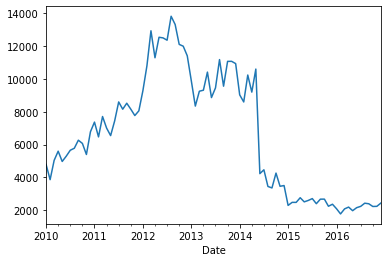

In [31]:
%matplotlib inline
ndf3.plot()

<AxesSubplot:xlabel='Date'>

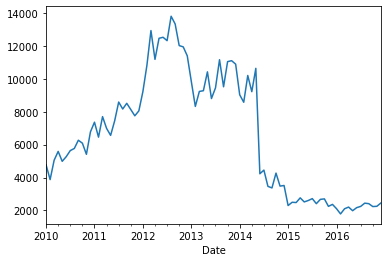

In [32]:
ndf4 = ndf2.Close
ndf4.plot()

In [36]:
ndf5 = ndf.pivot_table(index=pd.Grouper(freq='Q', key='Date'),columns=None, 
                       values=['Open','Close','High'], aggfunc=sum)
ndf5

,Close,High,Open
Date,,,
2010-03-31,13693.2529,13822.9137,13696.9030
2010-06-30,15840.0035,16029.2050,15864.3286
2010-09-30,17671.5755,17865.0699,17697.7283
2010-12-31,18275.4510,18399.7499,18247.7516
2011-03-31,21523.2095,21710.8577,21537.4400
2011-06-30,20996.3850,21192.2241,20987.1544
2011-09-30,25267.9700,25522.2430,25253.5000
2011-12-31,23941.5200,24165.4217,23967.4127
2012-03-31,32988.8089,33266.7486,32972.7451


In [39]:
ndf5 = ndf.pivot_table(index=pd.Grouper(freq='A', key='Date'),columns=None, 
                       values=['Open','Close','High'], aggfunc=sum)
ndf5

,Close,High,Open
Date,,,
2010-12-31,65480.2829,66116.9385,65506.7115
2011-12-31,91729.0845,92590.7465,91745.5071
2012-12-31,144012.4382,145456.3563,144162.9193
2013-12-31,119103.9754,120364.9876,119228.2552
2014-12-31,74441.3668,74985.3576,74375.9264
2015-12-31,30249.6950,30552.8474,30282.6400
2016-12-31,26360.2100,26567.6198,26335.3100


In [50]:
ndf6 = ndf.pivot_table(index=pd.Grouper(freq='BQ', key='Date'),columns=None, 
                       values=['Open','Close','High'], aggfunc=sum)
ndf6

,Close,High,Open
Date,,,
2010-03-31,13693.2529,13822.9137,13696.9030
2010-06-30,15840.0035,16029.2050,15864.3286
2010-09-30,17671.5755,17865.0699,17697.7283
2010-12-31,18275.4510,18399.7499,18247.7516
2011-03-31,21523.2095,21710.8577,21537.4400
2011-06-30,20996.3850,21192.2241,20987.1544
2011-09-30,25267.9700,25522.2430,25253.5000
2011-12-30,23941.5200,24165.4217,23967.4127
2012-03-30,32988.8089,33266.7486,32972.7451


In [44]:
ndf7 = ndf.pivot_table(index=pd.Grouper(freq='BA', key='Date'),columns=None, 
                       values=['Open','Close','High'], aggfunc=sum)
ndf7

,Close,High,Open
Date,,,
2010-12-31,65480.2829,66116.9385,65506.7115
2011-12-30,91729.0845,92590.7465,91745.5071
2012-12-31,144012.4382,145456.3563,144162.9193
2013-12-31,119103.9754,120364.9876,119228.2552
2014-12-31,74441.3668,74985.3576,74375.9264
2015-12-31,30249.6950,30552.8474,30282.6400
2016-12-30,26360.2100,26567.6198,26335.3100
2017-12-29,0.0000,0.0000,0.0000


In [52]:
ndf6.Close.max()

39469.274900000004